In [1]:
import numpy as np
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
# import sklearn
# from sklearn import ensemble
# from sklearn.ensemble import RandomForestClassifier
import warnings
import gc


import sys
import os

path = "data/"
os.chdir(path)


## Import SMILES & InChI

In [2]:
Calc = pd.read_csv("Calc.csv")

dfInChI = pd.read_csv("Calc.csv")
dfSMILES = pd.read_csv("LackingInChI copy.csv")

### Molecular descriptors  - InChI 

In [3]:
mol_list = [] # Initialize the list

for i in dfInChI.InChI: # Loop through the InChI column
    mol = Chem.MolFromInchi(i) # Get the molecule from each InChI in the column
    mol_list.append(mol)  # Append the molecule to the list


desc_list=[i[0] for i in Descriptors._descList] # Get the list of descriptors
descriptor = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list) # Create the calculator

descrs =  [] # Initialize the descriptor list

for i in range(len(mol_list)): # Loop through each metabolite in the list
    descrs.append(descriptor.CalcDescriptors(mol_list[i])) # Append the descriptors to the molecule list
molDesInChI = pd.DataFrame(descrs, columns= desc_list) # Create the dataframe
molDesInChI.head(5)  # Print the first 5 rows of the dataframe

[12:36:40] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match)



,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.000000,0.000000,0.000000,0.000000,0.342643,1.008,0.000,1.007276,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.382693,-5.621082,12.382693,0.043672,0.069723,663.430,636.214,663.110219,242,0,...,0,0,0,0,0,0,0,0,0,0
2,10.903369,-5.608866,10.903369,0.373579,0.483914,311.187,294.051,311.046597,112,0,...,0,0,0,0,0,0,0,0,0,0
3,9.404861,0.708333,9.404861,0.708333,0.444345,72.107,64.043,72.057515,30,0,...,0,0,0,0,0,0,0,0,0,0
4,10.138871,-0.983021,10.138871,0.015959,0.606252,213.257,196.121,213.124466,86,0,...,0,0,0,0,0,0,0,0,2,0


In [8]:
molDesInChI.to_csv("InChI_Calc_results.csv")

### Molecular descriptors  - SMILES

In [11]:
mol_list = [] # Initialize the list

for i in dfSMILES.SMILES: # Initialize the SMILES list
    mol = Chem.MolFromSmiles(i) # Get the molecule from the SMILES column
    mol_list.append(mol) # Add the molecule to the molecule list


desc_list=[i[0] for i in Descriptors._descList] # Get the list of descriptors
descriptor = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list) # Create the calculator

descrs =  [] # Initialize the descriptor list

for i in range(len(mol_list)): # Loop through each metabolite in the list
    descrs.append(descriptor.CalcDescriptors(mol_list[i])) # Append the descriptors to the molecule list
molDesSMILES = pd.DataFrame(descrs, columns= desc_list) # Create the dataframe
molDesSMILES.head(5) # Print the first 5 rows of the dataframe

Traceback (most recent call last):
  File "c:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "c:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\Chem\Descriptors.py", line 208, in FpDensityMorgan1
    return _FingerprintDensity(x, _rdMolDescriptors.GetMorganFingerprint, 1)
  File "c:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\Chem\Descriptors.py", line 204, in _FingerprintDensity
    return float(val) / mol.GetNumHeavyAtoms()
ZeroDivisionError: float division by zero
Traceback (most recent call last):
  File "c:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\ML\Descriptors\MoleculeDescriptors.py", line 88, in CalcDescriptors
    res[i] = fn(mol)
  File "c:\Users\meide\.conda\envs\rdkit\lib\site-packages\rdkit\Chem\Descriptors.py", line 212, in FpDensityMorgan2
    return _FingerprintDensity(x, _rdMolDescriptors.GetMorganFingerprint, 2)
  File "c:\Users\meide\.c

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.000000,1.333333,2.000000,1.333333,0.509536,175.824,175.824,175.812920,26,2,...,0,0,0,0,0,0,0,0,0,0
1,6.000000,6.000000,6.000000,6.000000,0.292487,34.014,31.998,34.005479,14,0,...,0,0,0,0,0,0,0,0,0,0
2,7.798611,0.183642,7.798611,0.183642,0.419854,78.136,72.088,78.013936,26,0,...,0,0,0,0,0,0,0,0,0,0
3,7.906250,0.093750,7.906250,0.093750,0.459049,76.095,68.031,76.052429,32,0,...,0,0,0,0,0,0,0,0,0,0
4,11.086299,-2.056545,11.086299,0.761005,0.102836,666.579,624.243,666.221858,264,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
molDesSMILES.to_csv("SMILES_Calc_results.csv")

# Get GEM edges

In [5]:
import reframed
from reframed import load_cbmodel

import sys
import os




In [ ]:
# path = "C:/Users/meide/Documents/GitHub/Master/data"
path = "data/"
os.chdir(path)

In [6]:
# model = load_cbmodel("e_coli_core.xml", flavor = "bigg");

model = load_cbmodel("iML1515.xml", flavor = "bigg")

c:\Users\meide\.conda\envs\rdkit\lib\site-packages\reframed\io\sbml.py:512: UserWarning: Gene association for reaction R_PFL is not DNF
  warn(f"Gene association for reaction {reaction_id} is not DNF")
c:\Users\meide\.conda\envs\rdkit\lib\site-packages\reframed\io\sbml.py:512: UserWarning: Gene association for reaction R_RNDR1 is not DNF
  warn(f"Gene association for reaction {reaction_id} is not DNF")
c:\Users\meide\.conda\envs\rdkit\lib\site-packages\reframed\io\sbml.py:512: UserWarning: Gene association for reaction R_RNDR3 is not DNF
  warn(f"Gene association for reaction {reaction_id} is not DNF")
c:\Users\meide\.conda\envs\rdkit\lib\site-packages\reframed\io\sbml.py:512: UserWarning: Gene association for reaction R_RNDR4 is not DNF
  warn(f"Gene association for reaction {reaction_id} is not DNF")
c:\Users\meide\.conda\envs\rdkit\lib\site-packages\reframed\io\sbml.py:512: UserWarning: Gene association for reaction R_CITL is not DNF
  warn(f"Gene association for reaction {reaction_

In [7]:

edges = [(s, p) for rxn in model.reactions.values() for s in rxn.get_substrates() for p in rxn.get_products()]

dfEdge = pd.DataFrame(edges, columns = ["source", "target"])


# dfEdge.to_csv("1515_edgelist.csv", index = False)

# Layout

In [4]:
gem = "TCA"
x_coord = "qed"
y_coord = "MolLogP"

### GEM viz

FileNotFoundError: [Errno 2] No such file or directory: 'TCA_edges.csv'

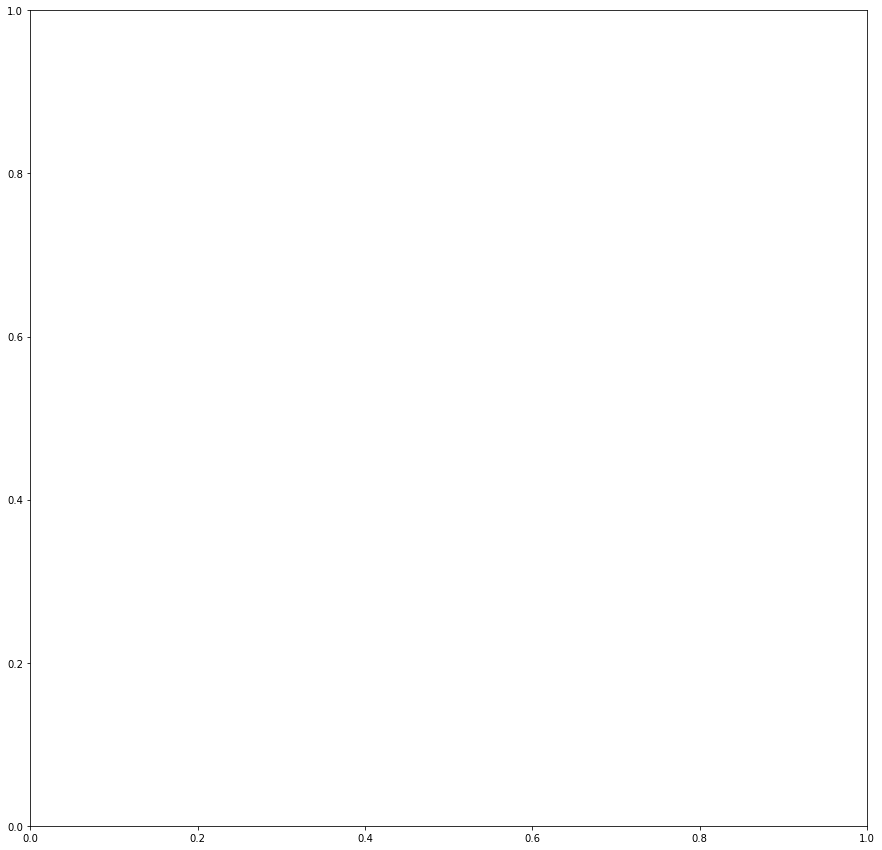

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np
import scipy.sparse
import matplotlib.colors as mcolors
import matplotlib.cm as cm





DescriptorPair = "{}_{}".format(x_coord, y_coord)
file_name = "{gem} + {DescriptorPair}".format(gem = gem, DescriptorPair = DescriptorPair)
fig, ax = plt.subplots(figsize=(15,15))


DriedPeach = pd.read_csv(f"{gem}_edges.csv")



#Genome-scale metabolic network

sources = DriedPeach["BiGG"]
targets = DriedPeach["target"]
coordinates = DriedPeach[[x_coord, y_coord]].values


edge_data = zip(sources,targets, coordinates)

H = nx.DiGraph()

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    H.add_node(src, pos = c)
    H.add_edge(src,dst)

H.remove_edges_from(nx.selfloop_edges(H))

pos_BC_gem = nx.get_node_attributes(H,'pos')

deg_centrality = nx.degree_centrality(H)
cent = np.fromiter(deg_centrality.values(), float)

centrality = np.fromiter(deg_centrality.values(), float)

degree = nx.degree(H)

degree_values = [v for k , v in degree]

degree_values = np.fromiter(degree_values, float)
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)
plt.tight_layout()
cb = plt.colorbar(scalarmappaple)
cb.ax.set_title("Node centrality")



# Draw GEM network
nx.draw_networkx_nodes(H, pos_BC_gem, node_color=centrality, node_size=centrality*2e3)
nx.draw_networkx_edges(H, pos_BC_gem, width = 0.1, alpha = 0.4, arrows = False) #width 0.1 for 1515 and 0.3 for core
# nx.draw_networkx_labels(H, pos_BC_gem)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.tight_layout()

# plt.savefig(f"Plots/{gem}_new/{file_name}.png", format="PNG")
plt.show()

### Pathway viz


In [7]:
import pandas as pd
Pathway = "Histidine"
x_coord = "mass_rank"
y_coord = "MolLogP_rank"

mass_rank_MolLogP_rank
Histidine
1515


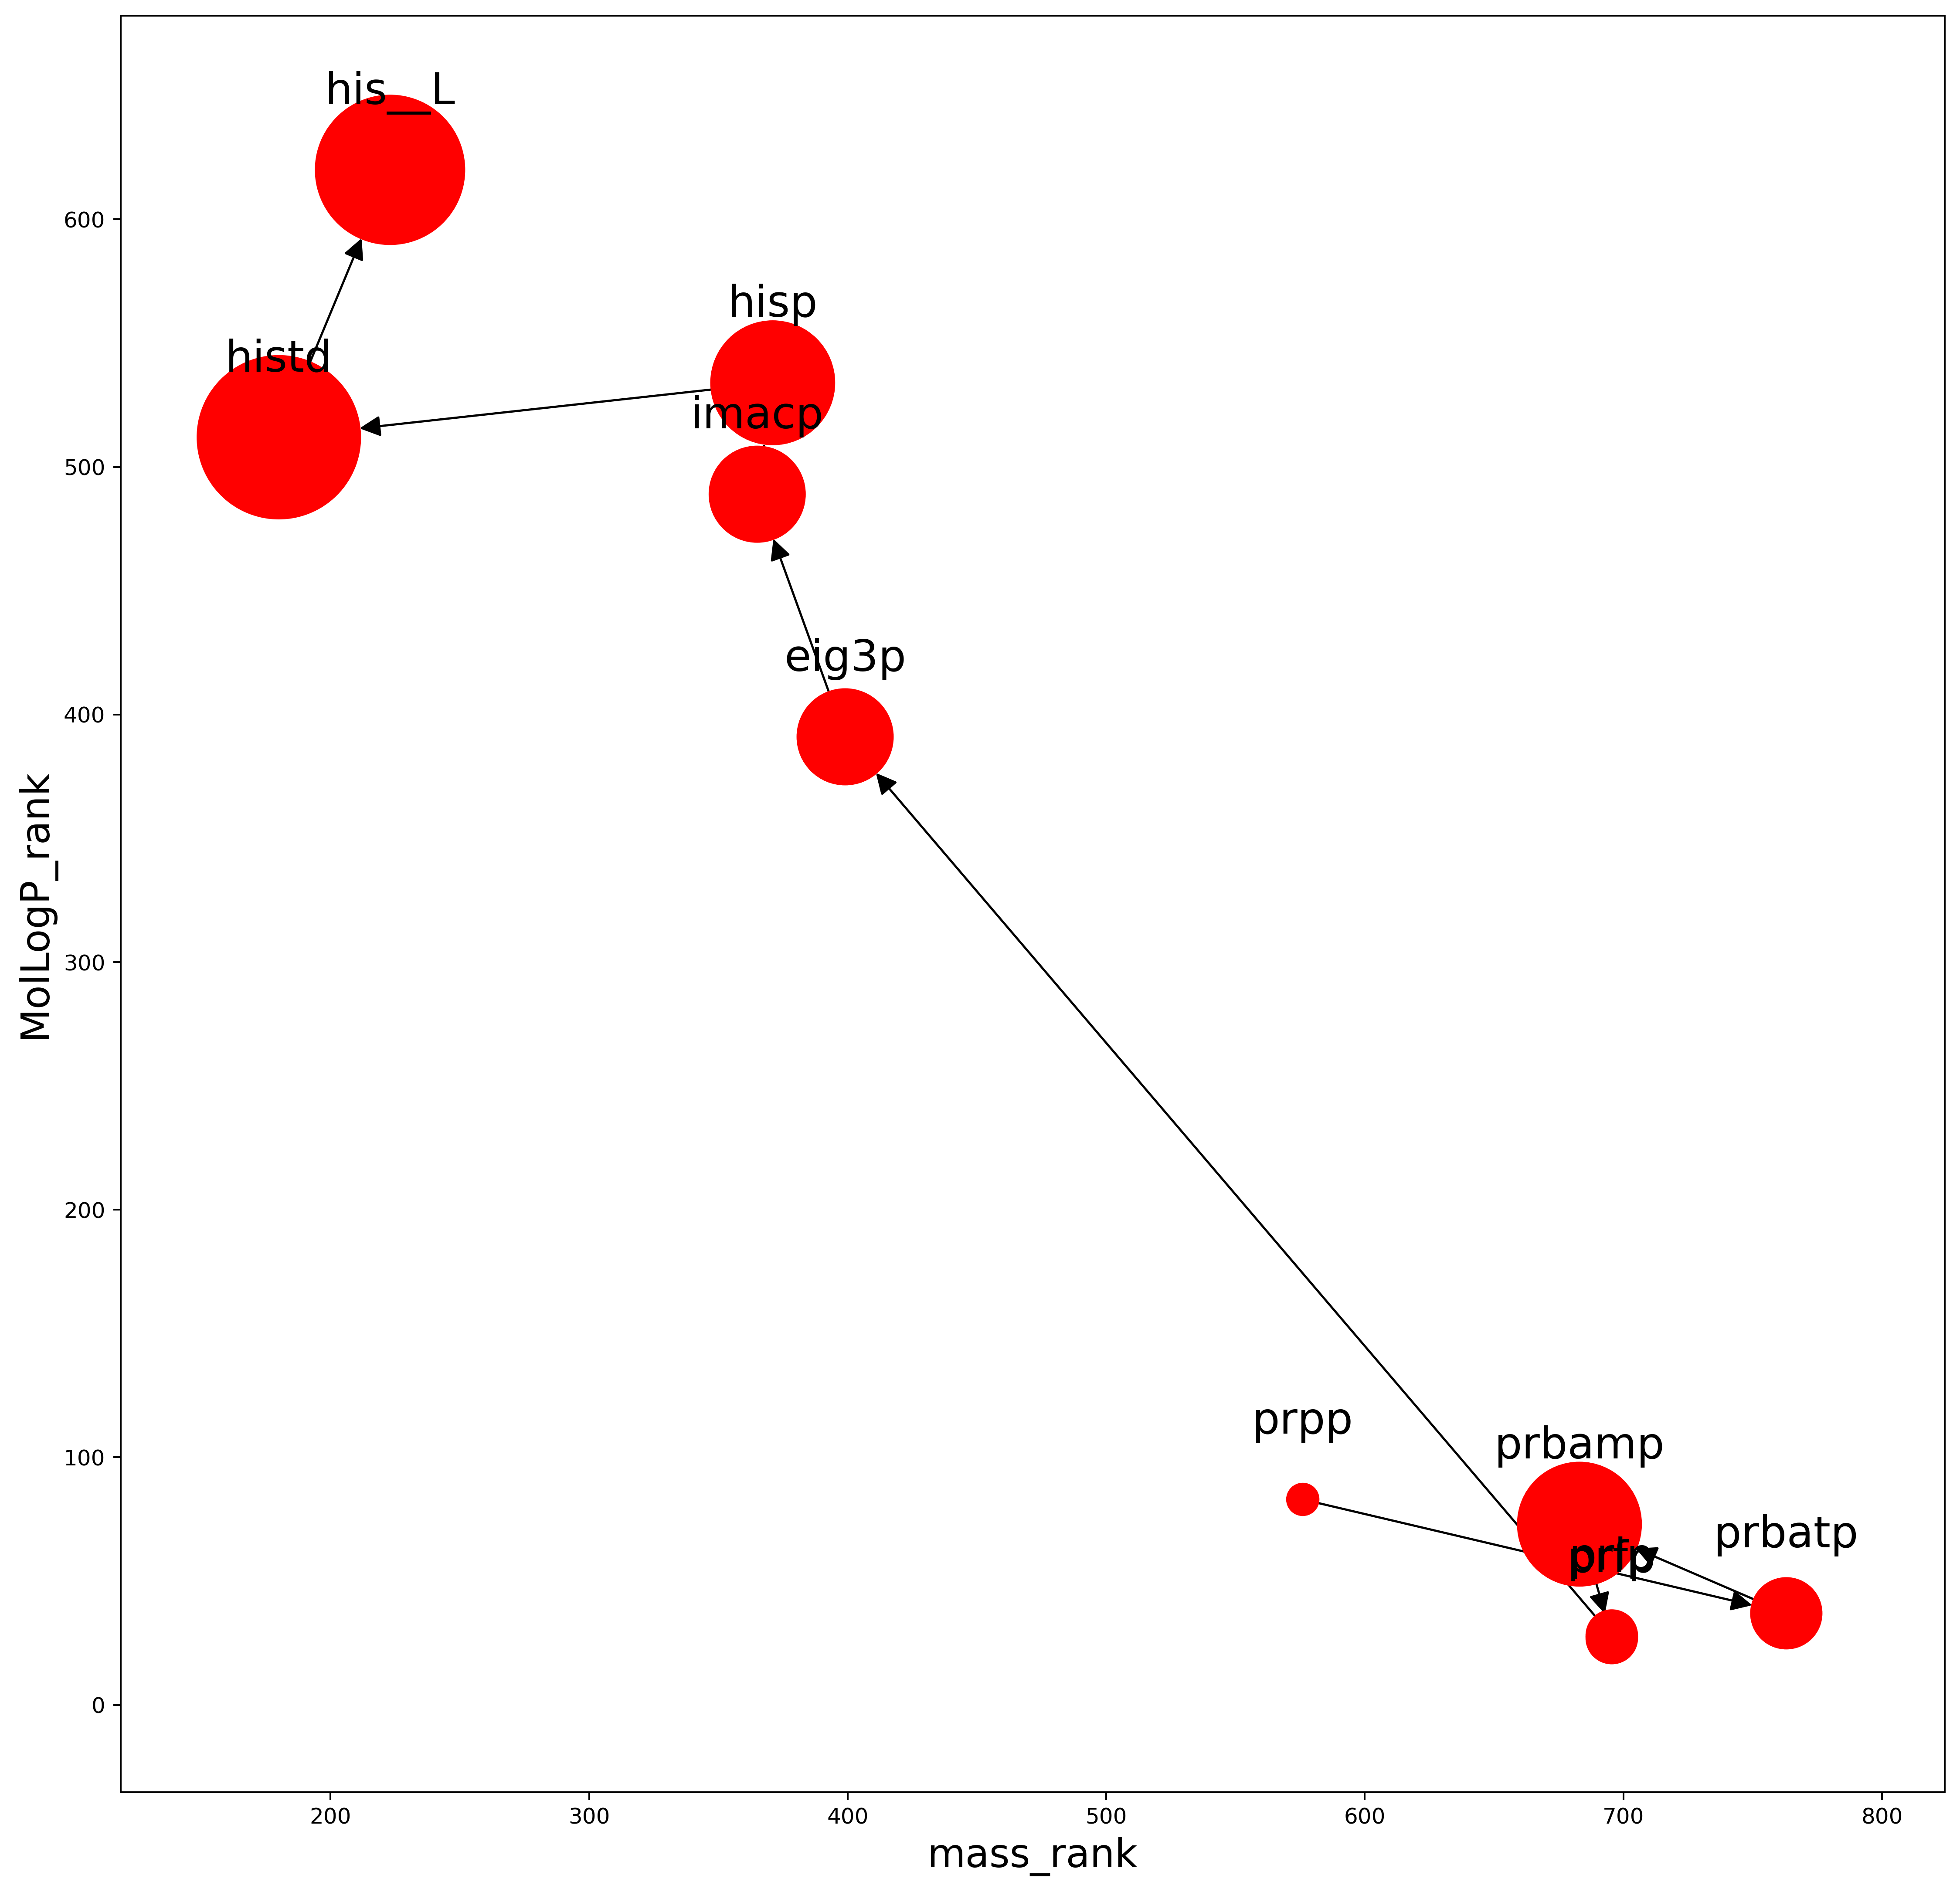

In [8]:
import pandas as pd
import networkx as nx
import networkx.algorithms.community as nx_com
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
import matplotlib.colors as mcolors
import matplotlib.cm as cm


# MetNet
MetNet = "1515"

fig, ax = plt.subplots(figsize=(15,15), dpi=360)


net2 = nx.DiGraph()
net3 = nx.Graph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv(f"{MetNet}.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv(f"{MetNet}_targets.csv")
#  😈  E coli core   😈  #
# data = pd.read_csv("Chemical_descriptors_e_coli_core_ranked.csv")
# target  = pd.read_csv("Chemical_descriptors_e_coli_core_ranked_targets.csv")
### 🗺️GEM data🗺️ ####

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + "_plot.csv")



test = data2["charge_rank"].values

test = np.fromiter(test, float)

# Network
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 
sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values



file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    net3.add_node(src, pos = c, node_color = 'red')
    net3.add_edge(src,dst)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')
pos_net2 = nx.get_node_attributes(net3,'pos')
# fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))
net3.remove_edges_from(nx.selfloop_edges(net3))


# centrality
deg_centrality = nx.degree_centrality(net3)
centrality = np.fromiter(deg_centrality.values(), float)


cent_color = [centrality[i] for i in range(len(centrality))]

# modularity
mod = nx_com.modularity(net3, nx_com.label_propagation_communities(net3))



pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

pos_net3_higher = {}
y_off = 40  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)



for k, v in pos_net2.items():
    pos_net3_higher[k] = (v[0]+x_off, v[1]+y_off)


# nx.draw(net2,pos_net1,node_size =5, with_labels = False,width = 0.1, arrows = False, ax = ax, alpha = 0.3)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

# nx.draw(net3,pos_net2,node_color="r", node_size=centrality*2e2, font_size = 40,width =1, arrows = True, arrowsize = 20, ax = ax)

nx.draw(net3,pos_net2,node_color="r", node_size=test*6, font_size = 40,width =1, arrows = True, arrowsize = 20, ax = ax)
nx.draw_networkx_labels(net3, pos_net3_higher,verticalalignment= "top", font_size =20)
#  bbox = dict(fc="white", boxstyle="circle",alpha =0.5, lw=1))

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)
print(Pathway)
print(MetNet)

# plt.savefig(f"Plots/{Pathway}/Styled_{file_name}.png", format="PNG")
# plt.savefig(f"Plots/Pathway_overlay/COMPARISON_{MetNet}_{Pathway}_{file_name}.png", format="PNG")

plt.show()


### GEM with pathway overlay

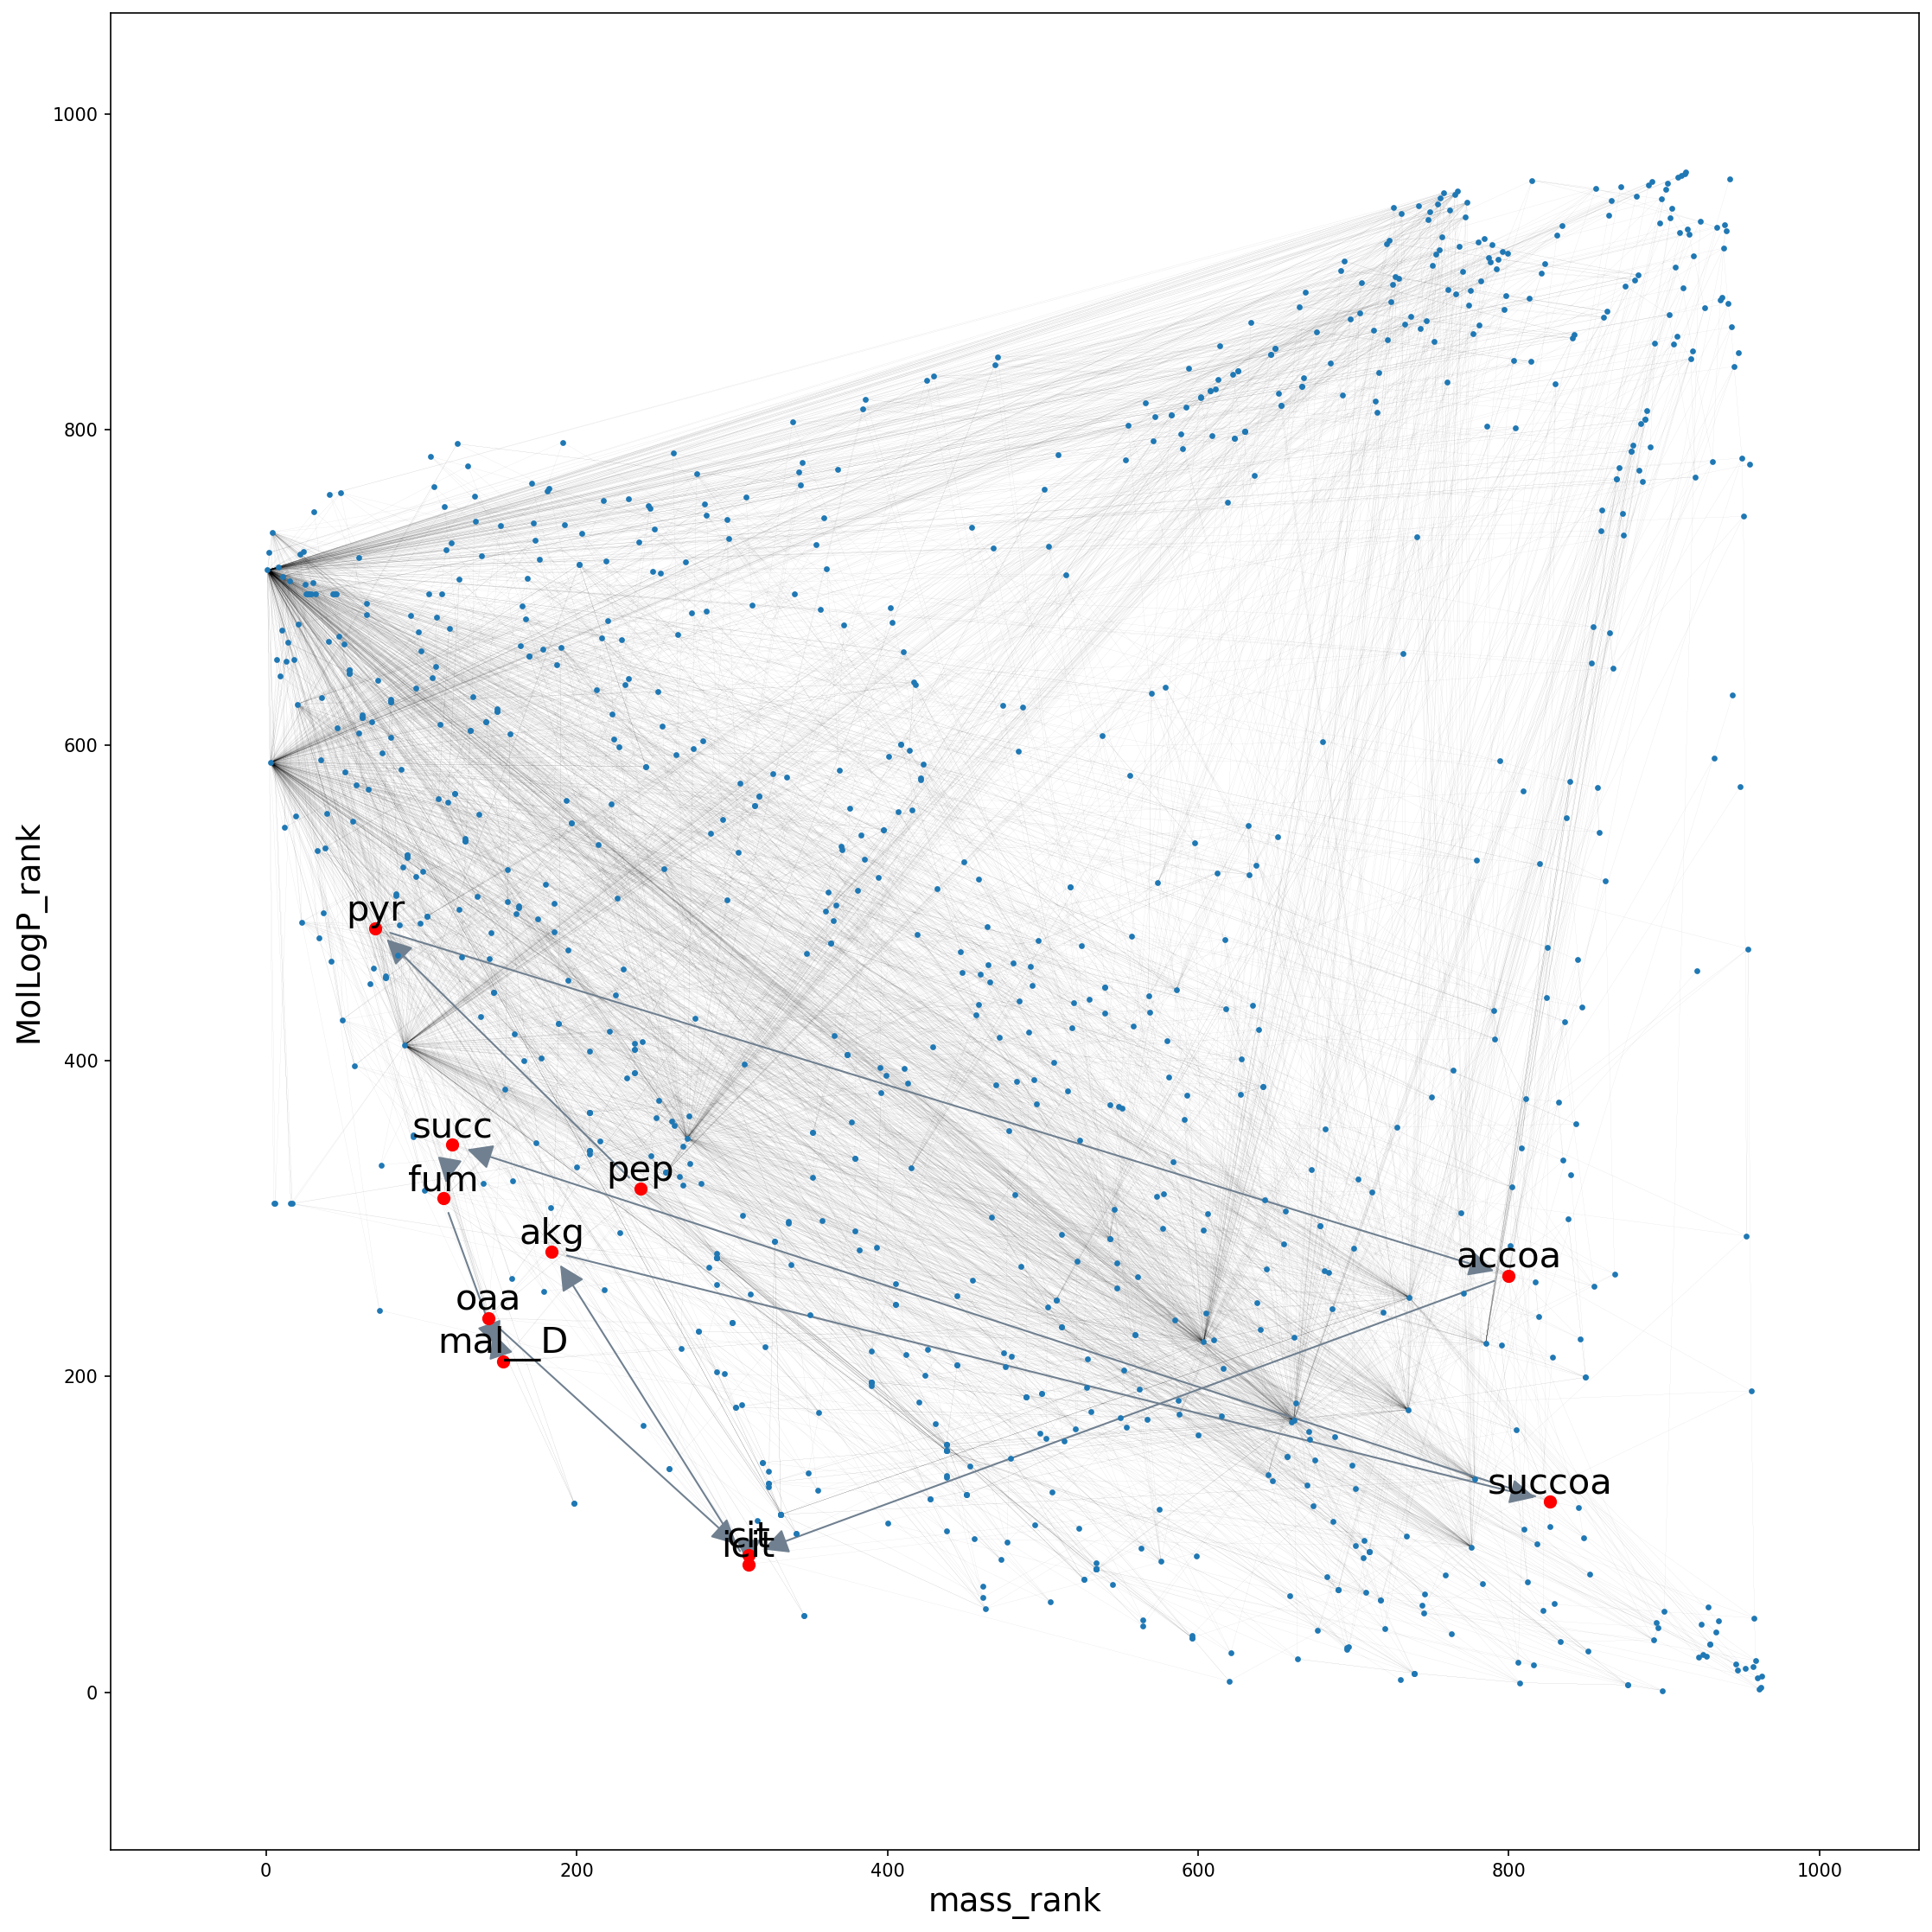

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_com
import numpy as np
import scipy.sparse
import matplotlib.colors as mcolors
import matplotlib.cm as cm




gem = "1515"
Pathway = "TCA"
x_coord = "mass_rank"
y_coord = "MolLogP_rank"
DescriptorPair = "{}_{}".format(x_coord, y_coord)
file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

fig, ax = plt.subplots(figsize=(15,15), dpi=150)


DriedPeach = pd.read_csv(f"{gem}_edges.csv")
# data2 = pd.read_csv(Pathway + "_plot.csv")

data2 = pd.read_csv(Pathway+"_plot.csv")

#Genome-scale metabolic network

sources = DriedPeach["BiGG"]
targets = DriedPeach["target"]
coordinates = DriedPeach[[x_coord, y_coord]].values


edge_data = zip(sources,targets, coordinates)

H = nx.DiGraph()

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    H.add_node(src, pos = c)
    H.add_edge(src,dst)

H.remove_edges_from(nx.selfloop_edges(H))

pos_BC_gem = nx.get_node_attributes(H,'pos')


# Pathway

sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

G = nx.DiGraph()

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    G.add_node(src, pos = c, node_color = 'red')
    G.add_edge(src,dst)

G.remove_edges_from(nx.selfloop_edges(G))


pos_BC_pathway = nx.get_node_attributes(G,'pos')

# GEM network stats


deg_centrality = nx.degree_centrality(H)
cent = np.fromiter(deg_centrality.values(), float)

centrality = np.fromiter(deg_centrality.values(), float)

degree = nx.degree(H)

degree_values = [v for k , v in degree]

degree_values = np.fromiter(degree_values, float)
normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
colormap = cm.viridis

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(cent)

# Pathway network stats
deg_centrality = nx.degree_centrality(G)
centrality = np.fromiter(deg_centrality.values(), float)
degree = nx.degree(G)
degree_values = [v for k , v in degree]

degree_values = np.fromiter(degree_values, float)



# cb = plt.colorbar(scalarmappaple)
# cb.ax.set_title("Node centrality")



# Draw GEM network
nx.draw_networkx_nodes(H, pos_BC_gem, node_size =5) # alpha =0.4) 
nx.draw_networkx_edges(H, pos_BC_gem, width = 0.015, arrows = False)

# Draw pathway 
nx.draw_networkx_nodes(G, pos_BC_pathway, node_color = "r", node_size=40)
nx.draw_networkx_edges(G, pos_BC_pathway, width = 1, arrows = True, arrowsize = 30, edge_color ="slategrey")
nx.draw_networkx_labels(G, pos_BC_pathway,verticalalignment= "bottom", font_size =20)


limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.tight_layout()

# plt.savefig(f"Plots/Pathway_overlay/COMPARISON_{gem}_{Pathway}_{file_name}.png", format="PNG")
plt.show()